In [1]:
using Turing, MCMCChains
using Turing: Variational
using Distributions, StatsPlots, Random, Plots

# this cell is for generating the data
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Here's what the first five coin flips look like:
data[1:5]

@model coinflip(y) = begin
    
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)
    
    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end;

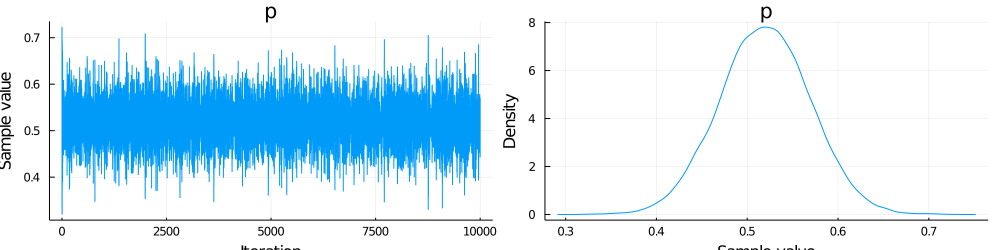

In [43]:
iterations = 10000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations, progress=false);

p_summary = chain[:p]
# plot(p_summary, seriestype = :histogram)
plot(chain[:p])

In [11]:
m = coinflip(data);
advi = ADVI(10, 1000)
q = vi(m, advi);


┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8876708987280726227
└ @ Turing.Variational /home/ritesh/.julia/packages/Turing/GMBTf/src/variational/VariationalInference.jl:204
[ADVI] Optimizing...: 100%|█████████████████████████████████████████| Time: 0:00:01


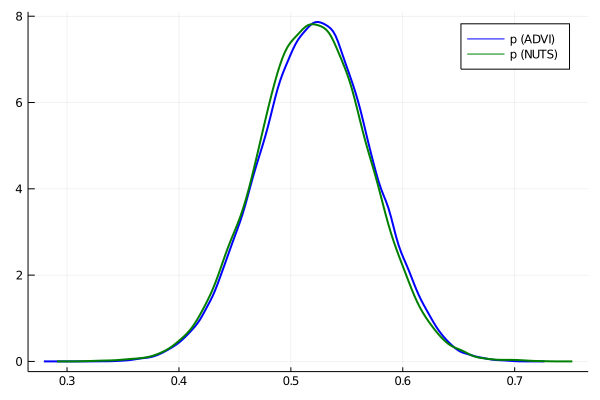

In [44]:
samples = rand(q, 100000);

Plots.PyPlotBackend()

# p1 = histogram(samples[1,:], bins=100, normed=true, alpha=0.2, color = :blue, label = "")
plot()
density!(samples[1,:], label = "p (ADVI)", color = :blue, linewidth = 2)
density!(collect(skipmissing(chain[:p].value)), label = "p (NUTS)", color = :green, linewidth = 2)
